11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8292 - loss: 0.6612 - val_accuracy: 0.9160 - val_loss: 0.3006
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9164 - loss: 0.3017 - val_accuracy: 0.9213 - val_loss: 0.2866
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9190 - loss: 0.2909 - val_accuracy: 0.9242 - val_loss: 0.2784
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9219 - loss: 0.2879 - val_accuracy: 0.9250 - val_loss: 0.2783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9238 - loss: 0.2796 - val_accuracy: 0.9263 - val_loss: 0.2765
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9254 - loss: 0.2810 - val_accuracy: 0.9275 - val_loss: 0.2749
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9282 - loss: 0.2703 - val_accuracy: 0.9270 - val_loss: 0.2779
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━

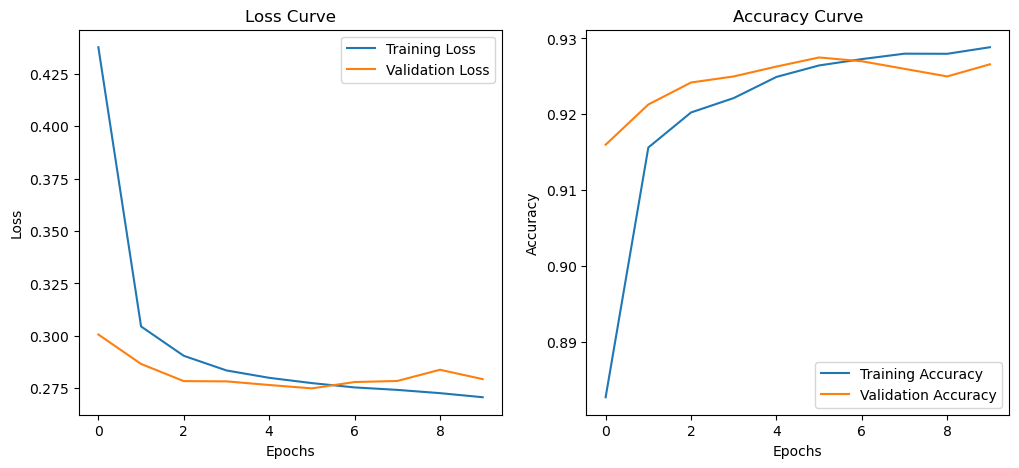

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Dataset (MNIST)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Normalize and Flatten Data
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Define Sequential Model (No Hidden Layers)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),  # 28x28 flattened input
    tf.keras.layers.Dense(10, activation="softmax")  # 10 output classes
])

# Step 4: Compile Model
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Step 5: Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Step 6: Plot Loss & Accuracy Curves
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve")

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Curve")

    plt.show()

plot_history(history)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9303 - loss: 0.2708 - val_accuracy: 0.9271 - val_loss: 0.2766
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9326 - loss: 0.2564 - val_accuracy: 0.9285 - val_loss: 0.2734
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9317 - loss: 0.2637 - val_accuracy: 0.9267 - val_loss: 0.2727
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9319 - loss: 0.2601 - val_accuracy: 0.9265 - val_loss: 0.2720
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9323 - loss: 0.2590 - val_accuracy: 0.9274 - val_loss: 0.2708
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9329 - loss: 0.2550 - val_accuracy: 0.9267 - val_loss: 0.2699
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9320 - loss: 0.2579 - val_accuracy: 0.9267 - val_loss: 0.2688
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9325 - loss: 0.2562 - val_accuracy: 0.9274 - val_loss:

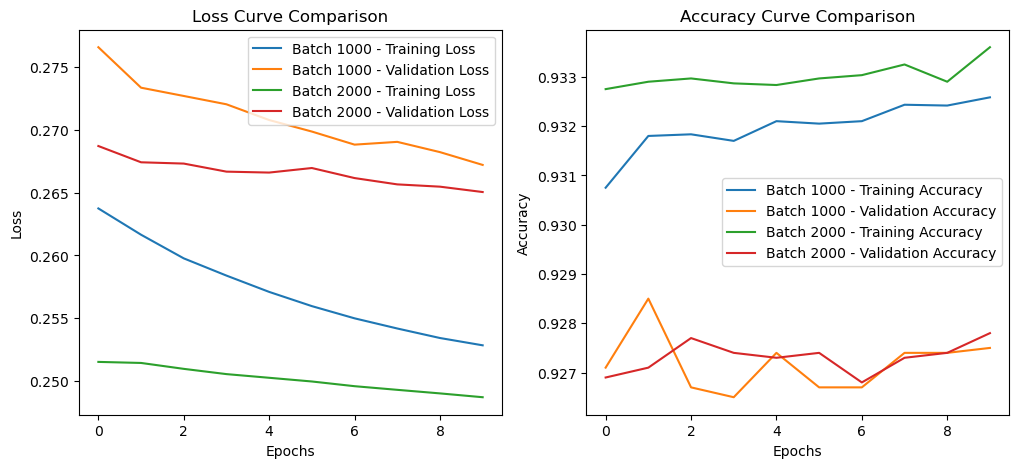

In [2]:
# Task 2: Batch Size Tuning

# Train with batch size = 1000
history_1000 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1000)

# Train with batch size = 2000
history_2000 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=2000)

# Function to plot both training runs
def plot_comparison(history_1000, history_2000):
    plt.figure(figsize=(12, 5))

    # Plot loss comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_1000.history["loss"], label="Batch 1000 - Training Loss")
    plt.plot(history_1000.history["val_loss"], label="Batch 1000 - Validation Loss")
    plt.plot(history_2000.history["loss"], label="Batch 2000 - Training Loss")
    plt.plot(history_2000.history["val_loss"], label="Batch 2000 - Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve Comparison")

    # Plot accuracy comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_1000.history["accuracy"], label="Batch 1000 - Training Accuracy")
    plt.plot(history_1000.history["val_accuracy"], label="Batch 1000 - Validation Accuracy")
    plt.plot(history_2000.history["accuracy"], label="Batch 2000 - Training Accuracy")
    plt.plot(history_2000.history["val_accuracy"], label="Batch 2000 - Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Curve Comparison")

    plt.show()

plot_comparison(history_1000, history_2000)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9334 - loss: 0.2459 - val_accuracy: 0.9279 - val_loss: 0.2650
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9332 - loss: 0.2523 - val_accuracy: 0.9281 - val_loss: 0.2650
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9345 - loss: 0.2443 - val_accuracy: 0.9278 - val_loss: 0.2649
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9329 - loss: 0.2520 - val_accuracy: 0.9276 - val_loss: 0.2649
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9349 - loss: 0.2436 - val_accuracy: 0.9276 - val_loss: 0.2649
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9335 - loss: 0.2466 - val_accuracy: 0.9275 - val_loss: 0.2649
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9344 - loss: 0.2443 - val_accuracy: 0.9275 - val_loss: 0.2649
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9355 - loss: 0.2418 - val_accuracy: 0.9275 - val_loss

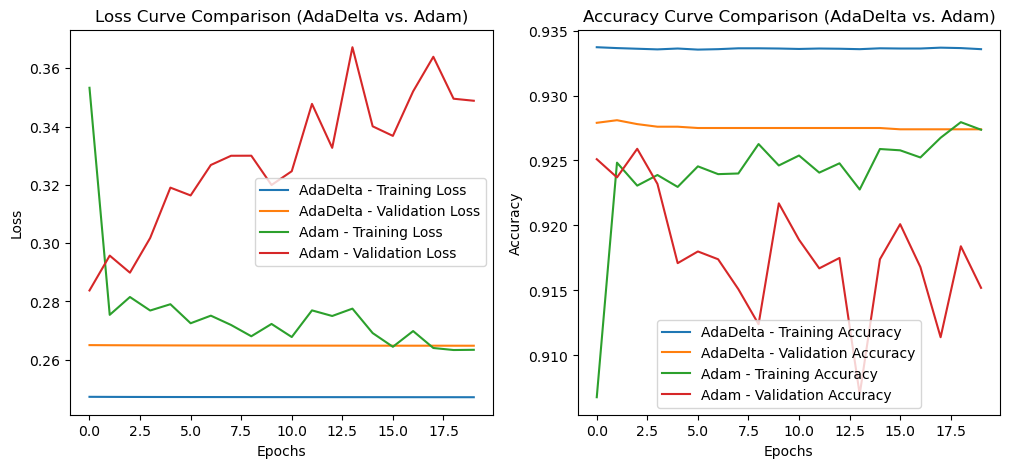

In [3]:
# Task 3: Optimizer Adjustment

# Compile model with AdaDelta optimizer (learning rate 0.01)
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train with AdaDelta for 20 epochs
history_adadelta = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1000)

# Recompile model with Adam optimizer (learning rate 0.05)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train with Adam for 20 epochs
history_adam = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1000)

# Function to plot optimizer comparison
def plot_optimizer_comparison(history_adadelta, history_adam):
    plt.figure(figsize=(12, 5))

    # Plot loss comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_adadelta.history["loss"], label="AdaDelta - Training Loss")
    plt.plot(history_adadelta.history["val_loss"], label="AdaDelta - Validation Loss")
    plt.plot(history_adam.history["loss"], label="Adam - Training Loss")
    plt.plot(history_adam.history["val_loss"], label="Adam - Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve Comparison (AdaDelta vs. Adam)")

    # Plot accuracy comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_adadelta.history["accuracy"], label="AdaDelta - Training Accuracy")
    plt.plot(history_adadelta.history["val_accuracy"], label="AdaDelta - Validation Accuracy")
    plt.plot(history_adam.history["accuracy"], label="Adam - Training Accuracy")
    plt.plot(history_adam.history["val_accuracy"], label="Adam - Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Curve Comparison (AdaDelta vs. Adam)")

    plt.show()

plot_optimizer_comparison(history_adadelta, history_adam)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6869 - loss: 1.1511 - val_accuracy: 0.9284 - val_loss: 0.2444
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9366 - loss: 0.2132 - val_accuracy: 0.9367 - val_loss: 0.2096
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9478 - loss: 0.1781 - val_accuracy: 0.9507 - val_loss: 0.1767
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9576 - loss: 0.1434 - val_accuracy: 0.9527 - val_loss: 0.1722
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9633 - loss: 0.1230 - val_accuracy: 0.9515 - val_loss: 0.1632
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9645 - loss: 0.1215 - val_accuracy: 0.9529 - val_loss: 0.1676
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9676 - loss: 0.1082 - val_accuracy: 0.9576 - val_loss: 0.1692
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9680 - loss: 0.1066 - val_accuracy: 0.9578 - v

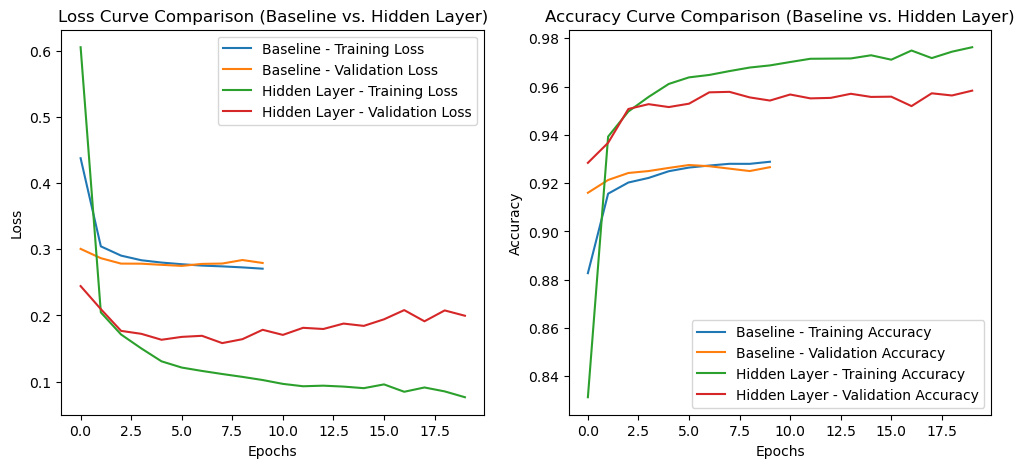

In [4]:
# Task 4: Hidden Layer Addition

# Define a new model with one hidden layer (50 units, ReLU)
model_hidden = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),  # Input layer
    tf.keras.layers.Dense(50, activation="relu"),  # Hidden layer with 50 neurons
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer
])

# Compile the model with Adam optimizer (learning rate 0.05)
model_hidden.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

# Train the model for 20 epochs
history_hidden = model_hidden.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1000)

# Function to compare Task 1 (Baseline) vs Task 4 (Hidden Layer)
def plot_hidden_layer_comparison(history_baseline, history_hidden):
    plt.figure(figsize=(12, 5))

    # Plot loss comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_baseline.history["loss"], label="Baseline - Training Loss")
    plt.plot(history_baseline.history["val_loss"], label="Baseline - Validation Loss")
    plt.plot(history_hidden.history["loss"], label="Hidden Layer - Training Loss")
    plt.plot(history_hidden.history["val_loss"], label="Hidden Layer - Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve Comparison (Baseline vs. Hidden Layer)")

    # Plot accuracy comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_baseline.history["accuracy"], label="Baseline - Training Accuracy")
    plt.plot(history_baseline.history["val_accuracy"], label="Baseline - Validation Accuracy")
    plt.plot(history_hidden.history["accuracy"], label="Hidden Layer - Training Accuracy")
    plt.plot(history_hidden.history["val_accuracy"], label="Hidden Layer - Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Curve Comparison (Baseline vs. Hidden Layer)")

    plt.show()

# Use Task 1 history for comparison
plot_hidden_layer_comparison(history, history_hidden)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6916 - loss: 0.9447 - val_accuracy: 0.9290 - val_loss: 0.2488
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8905 - loss: 0.3415 - val_accuracy: 0.9395 - val_loss: 0.2074
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9116 - loss: 0.2840 - val_accuracy: 0.9483 - val_loss: 0.1711
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9164 - loss: 0.2651 - val_accuracy: 0.9449 - val_loss: 0.1773
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9188 - loss: 0.2545 - val_accuracy: 0.9523 - val_loss: 0.1673
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9253 - loss: 0.2389 - val_accuracy: 0.9498 - val_loss: 0.1803
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9248 - loss: 0.2362 - val_accuracy: 0.9533 - val_loss: 0.1727
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9283 - loss: 0.2225 - val_accuracy: 0.9490 - v

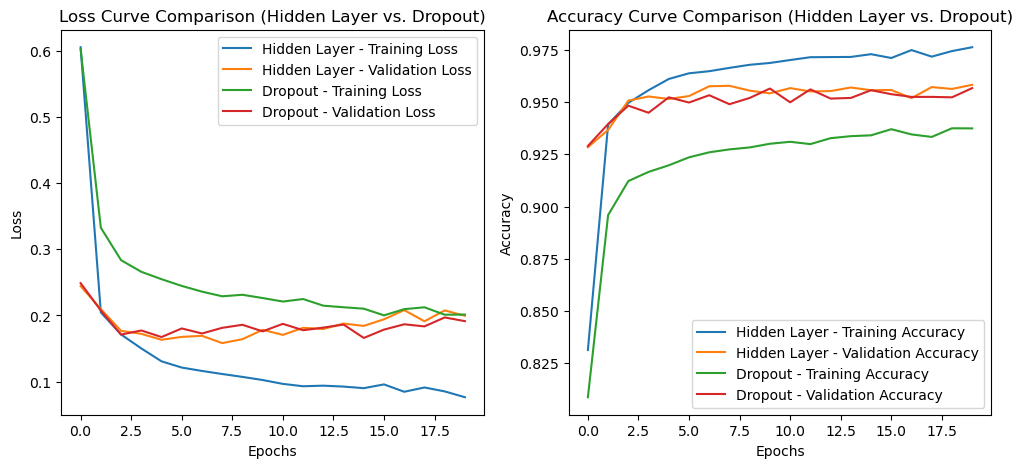

In [5]:
# Task 5: Dropout Application

# Define a model with one hidden layer (50 units, ReLU) and a Dropout layer (0.2)
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),  # Input layer
    tf.keras.layers.Dense(50, activation="relu"),  # Hidden layer
    tf.keras.layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer
])

# Compile the model with Adam optimizer (learning rate 0.05)
model_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

# Train the model for 20 epochs
history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1000)

# Function to compare Task 4 (Hidden Layer) vs Task 5 (Dropout)
def plot_dropout_comparison(history_hidden, history_dropout):
    plt.figure(figsize=(12, 5))

    # Plot loss comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_hidden.history["loss"], label="Hidden Layer - Training Loss")
    plt.plot(history_hidden.history["val_loss"], label="Hidden Layer - Validation Loss")
    plt.plot(history_dropout.history["loss"], label="Dropout - Training Loss")
    plt.plot(history_dropout.history["val_loss"], label="Dropout - Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curve Comparison (Hidden Layer vs. Dropout)")

    # Plot accuracy comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_hidden.history["accuracy"], label="Hidden Layer - Training Accuracy")
    plt.plot(history_hidden.history["val_accuracy"], label="Hidden Layer - Validation Accuracy")
    plt.plot(history_dropout.history["accuracy"], label="Dropout - Training Accuracy")
    plt.plot(history_dropout.history["val_accuracy"], label="Dropout - Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Curve Comparison (Hidden Layer vs. Dropout)")

    plt.show()

# Compare Task 4 vs Task 5
plot_dropout_comparison(history_hidden, history_dropout)


Epoch 1/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.3965 - mae: 0.7677 - val_loss: 0.4476 - val_mae: 0.4710
Epoch 2/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5004 - mae: 0.4789 - val_loss: 0.4137 - val_mae: 0.4485
Epoch 3/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4625 - mae: 0.4639 - val_loss: 0.4161 - val_mae: 0.4285
Epoch 4/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4042 - mae: 0.4475 - val_loss: 0.3751 - val_mae: 0.4216
Epoch 5/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4024 - mae: 0.4448 - val_loss: 0.3701 - val_mae: 0.4198
Epoch 6/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3907 - mae: 0.4417 - val_loss: 0.3741 - val_mae: 0.4153
Epoch 7/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4119 - mae: 0.4419 - val_loss: 0.3924 - val_mae: 0.4272
Epoch 8/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3912 - mae: 0.4417 - val_loss: 0.3592 - val_mae: 0.4223
Epoch 9/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

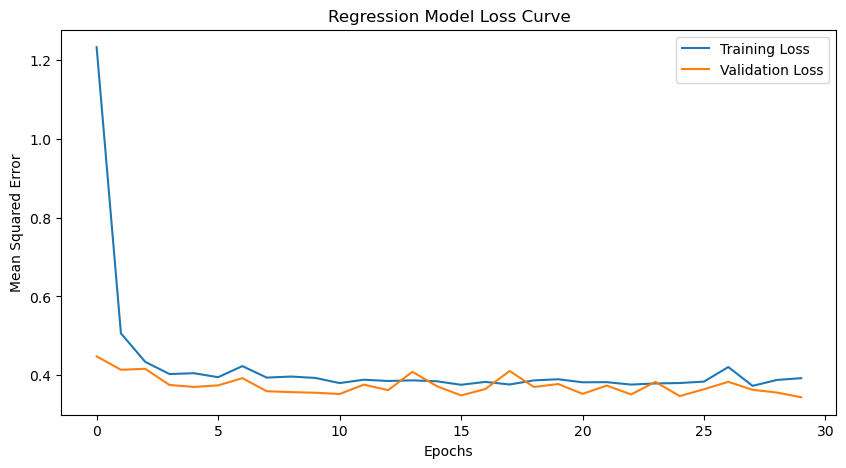

In [6]:
# Task X (Bonus): Regression Tuning

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Load California Housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
x, y = data.data, data.target  # Features and target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step 2: Define a model with input layer (feature count), hidden layer (20 units, ReLU), and 1 output
model_regression = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(20, activation="relu"),  # Hidden layer
    tf.keras.layers.Dropout(0.1),  # Dropout layer with 10% dropout rate
    tf.keras.layers.Dense(1)  # Output layer (single neuron for regression)
])

# Step 4: Compile the model with RMSprop optimizer (learning rate 0.01) and MSE loss
model_regression.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                         loss="mean_squared_error",
                         metrics=["mae"])

# Step 5: Train the model for 30 epochs
history_regression = model_regression.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

# Function to plot loss curves
def plot_regression_loss(history_regression):
    plt.figure(figsize=(10, 5))

    # Plot training and validation loss
    plt.plot(history_regression.history["loss"], label="Training Loss")
    plt.plot(history_regression.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title("Regression Model Loss Curve")

    plt.show()

# Display the loss curve
plot_regression_loss(history_regression)
